# Data Literacy Project - Cleaning and Preprocessing


In [85]:
#imports
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Loading all the data from the LEMON Dataset

In [86]:
data_dir = "/Users/samuel/Desktop/EKU Tübingen/data_literacy/project/data"  
meta_file = os.path.join(data_dir, "META_File_IDs_Age_Gender_Education_Drug_Smoke_SKID_LEMON.csv")

In [87]:
# Emotion Regulation Tests
emotion_files = [
    "Emotion_and_Personality_Test_Battery_LEMON/ERQ.csv",  # Emotion Regulation Questionnaire
    "Emotion_and_Personality_Test_Battery_LEMON/CERQ.csv"  # Cognitive Emotion Regulation Questionnaire
]

# Behavioral Features
behavioral_files = [
    "Emotion_and_Personality_Test_Battery_LEMON/MSPSS.csv",  # Perceived Social Support
    "Emotion_and_Personality_Test_Battery_LEMON/F-SozU_K-22.csv",  # Social Support Questionnaire
    "Emotion_and_Personality_Test_Battery_LEMON/BISBAS.csv"  # BIS/BAS
]

# Personality and Emotional Traits
personality_files = [
    "Emotion_and_Personality_Test_Battery_LEMON/NEO_FFI.csv",  # Personality Inventory
    "Emotion_and_Personality_Test_Battery_LEMON/STAI_G_X2.csv",  # Anxiety Inventory
    "Emotion_and_Personality_Test_Battery_LEMON/STAXI.csv"  # Anger Expression Inventory
]

# Cognitive Tests
cognitive_files = [
    "Cognitive_Test_Battery_LEMON/CVLT.csv",  # Verbal Learning Test
    "Cognitive_Test_Battery_LEMON/TAP-Alertness.csv",  # TAP Alertness
    "Cognitive_Test_Battery_LEMON/TAP-Working Memory.csv"  # TAP Working Memory
]

# Medical Data Files
medical_files = [
    "Medical_LEMON/Anthropometry/Anthropometry_LEMON.csv",
    "Medical_LEMON/Blood Pressure/Blood_Pressure_LEMON.csv",
    "Medical_LEMON/Blood Sample/Blood_Results_LEMON.csv",
]

# Combine All Files
all_files = {
    "meta": meta_file,
    "emotion": emotion_files,
    "behavioral": behavioral_files,
    "personality": personality_files,
    "cognitive": cognitive_files,
    "medical": medical_files
}

# Load Metadata
print("Loading Metadata...")
meta = pd.read_csv(all_files["meta"])
meta.rename(columns={meta.columns[0]: "subnumber"}, inplace=True)

# Load and Merge All Datasets
dataframes = []

# Function to Load and Rename First Column to 'subnumber'
def load_and_prepare(file_path):
    df = pd.read_csv(file_path)
    df.rename(columns={df.columns[0]: "subnumber"}, inplace=True)
    return df

# Load Emotion, Behavioral, Personality, Cognitive, and Medical Data
for category, files in all_files.items():
    if category != "meta":
        for file in files:
            file_path = os.path.join(data_dir, file)
            try:
                df = load_and_prepare(file_path)
                dataframes.append(df)
                print(f"Loaded: {file} with shape {df.shape}")
            except Exception as e:
                print(f"Error loading {file}: {e}")

Loading Metadata...
Loaded: Emotion_and_Personality_Test_Battery_LEMON/ERQ.csv with shape (221, 3)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/CERQ.csv with shape (221, 10)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/MSPSS.csv with shape (221, 5)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/F-SozU_K-22.csv with shape (221, 6)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/BISBAS.csv with shape (221, 5)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/NEO_FFI.csv with shape (221, 6)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/STAI_G_X2.csv with shape (221, 2)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/STAXI.csv with shape (221, 8)
Loaded: Cognitive_Test_Battery_LEMON/CVLT.csv with shape (228, 17)
Loaded: Cognitive_Test_Battery_LEMON/TAP-Alertness.csv with shape (228, 18)
Loaded: Cognitive_Test_Battery_LEMON/TAP-Working Memory.csv with shape (228, 13)
Loaded: Medical_LEMON/Anthropometry/Anthropometry_LEMON.csv with shape (228, 5)
Loaded: Medical_L

In [88]:
df.head()

,subnumber,Date_Blood_Drawing_LabAnalysis,ALAT_in_ µkat_l,ALAT_Reference_range,ASAT_in_µkat_l,ASAT_Reference_range,HCT _in_l_l,HCT_Reference range,HGB_in_mmol_l,HGB_Reference range,...,NA_in_mmol_l,NA_Reference range,PT_in_%,PT_Reference range,PTR,PTS_in_sec,TRIG_in_mmol_l,TRIG_Reference range,TSH_in_mU_l,TSH_Reference range
0,sub-032311,DAY1+0,0.28,0.17 - 0.85,0.38,0.17 - 0.85,0.445,0.4 - 0.53,9.4,8.4 - 10.9,...,138.7,135 - 145,108.0,> 70,NaN,NaN,1.79,< 1.7,1.48,0.4 - 3.77
1,sub-032309,DAY1+0,0.24,0.17 - 0.85,0.30,0.17 - 0.85,0.386,0.4 - 0.53,7.9,8.4 - 10.9,...,140.1,135 - 145,114.0,> 70,1.03,11.7,0.80,< 2.26,1.65,0.4 - 3.77
2,sub-032382,DAY1+0,1.10,0.17 - 0.85,0.47,0.17 - 0.85,0.441,0.4 - 0.53,9.6,8.4 - 10.9,...,136.6,135 - 145,96.0,> 70,0.97,11.1,2.60,< 2.26,1.31,0.4 - 3.77
3,sub-032302,DAY1+0,0.22,0.17 - 0.58,0.27,0.17 - 0.6,0.352,0.36 - 0.48,7.2,7.5 - 9.9,...,140.1,135 - 145,101.0,> 70,0.94,10.7,1.88,< 2.26,2.67,0.4 - 3.77
4,sub-032315,DAY1+0,0.31,0.17 - 0.85,0.31,0.17 - 0.85,0.465,0.4 - 0.53,9.8,8.4 - 10.9,...,136.2,135 - 145,89.0,> 70,1.03,11.7,1.90,< 2.26,1.75,0.4 - 3.77


In [89]:
# Merge All DataFrames
merged_data = meta.copy()

for i, df in enumerate(dataframes):
    if "subnumber" not in df.columns:
        print(f"Skipping file {i+1}: Missing 'subnumber' column.")
        continue
    
    try:
        merged_data = pd.merge(merged_data, df, on="subnumber", how="inner")
        print(f"Merged DataFrame {i+1} successfully.")
    except Exception as e:
        print(f"Error merging DataFrame {i+1}: {e}")

# Remove Duplicate Columns if Any
merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]

# Save Merged Data to CSV
output_path = os.path.join(data_dir, "final_merged_dataset.csv")
merged_data.to_csv(output_path, index=False)
print(f"Final Merged Data Saved at: {output_path}")

Merged DataFrame 1 successfully.
Merged DataFrame 2 successfully.
Merged DataFrame 3 successfully.
Merged DataFrame 4 successfully.
Merged DataFrame 5 successfully.
Merged DataFrame 6 successfully.
Merged DataFrame 7 successfully.
Merged DataFrame 8 successfully.
Merged DataFrame 9 successfully.
Merged DataFrame 10 successfully.
Merged DataFrame 11 successfully.
Merged DataFrame 12 successfully.
Merged DataFrame 13 successfully.
Merged DataFrame 14 successfully.
Final Merged Data Saved at: /Users/samuel/Desktop/EKU Tübingen/data_literacy/project/data/final_merged_dataset.csv


In [99]:
# Data Cleaning
missing_threshold = 0.3
missing_percent = merged_data.isnull().mean()
columns_to_drop = missing_percent[missing_percent > missing_threshold].index

# Drop Columns and Handle Missing Data
merged_data_clean = merged_data.drop(columns=columns_to_drop)

# Impute Missing Values
for col in merged_data_clean.columns:
    if merged_data_clean[col].dtype == 'object':
        merged_data_clean[col].fillna(merged_data_clean[col].mode()[0], inplace=True)
    else:
        merged_data_clean[col].fillna(merged_data_clean[col].median(), inplace=True)
        
# Ensure 'Relationship_Status' Is Uppercase
if "Relationship_Status" in merged_data_clean.columns:
    merged_data_clean["Relationship_Status"] = merged_data_clean["Relationship_Status"].str.upper()

# Check Remaining Missing Values
print("Remaining Missing Values After Cleaning:")
merged_data_clean.isnull().sum().sort_values(ascending=False)
merged_data_clean.head()

Remaining Missing Values After Cleaning:


,subnumber,Gender_ 1=female_2=male,Age,Handedness,Education,DRUG,DRUG_0=negative_1=Positive,Smoking,"Smoking_num_(Non-smoker=1, Occasional Smoker=2, Smoker=3)",SKID_Diagnoses,...,LDLC_in_mmol_l,LDLC_Reference range,NA_in_mmol_l,NA_Reference range,PT_in_%,PT_Reference range,TRIG_in_mmol_l,TRIG_Reference range,TSH_in_mU_l,TSH_Reference range
0,sub-032311,2,20-25,right,Gymnasium,negative,0.0,non-smoker,1.0,none,...,3.66,< 4.2,138.7,135 - 145,108.0,> 70,1.79,< 1.7,1.48,0.4 - 3.77
1,sub-032309,2,20-25,right,Gymnasium,negative,0.0,occasional smoker,2.0,none,...,2.31,< 4.2,140.1,135 - 145,114.0,> 70,0.80,< 2.26,1.65,0.4 - 3.77
2,sub-032382,2,25-30,right,Gymnasium,negative,0.0,occasional smoker,2.0,none,...,3.94,< 4.2,136.6,135 - 145,96.0,> 70,2.60,< 2.26,1.31,0.4 - 3.77
3,sub-032302,1,20-25,right,Gymnasium,negative,0.0,non-smoker,1.0,none,...,3.37,< 4.2,140.1,135 - 145,101.0,> 70,1.88,< 2.26,2.67,0.4 - 3.77
4,sub-032315,2,20-25,right,Gymnasium,negative,0.0,non-smoker,1.0,none,...,2.81,< 4.2,136.2,135 - 145,89.0,> 70,1.90,< 2.26,1.75,0.4 - 3.77


In [100]:
from sklearn.preprocessing import LabelEncoder

# Automatically Detect Categorical Columns (Excluding 'Age')
categorical_cols = merged_data_clean.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove("Age") if "Age" in categorical_cols else None

# Initialize Label Encoders Dictionary
label_encoders = {}

# Encode Categorical Variables
for col in categorical_cols:
    if col in merged_data_clean.columns:
        le = LabelEncoder()
        merged_data_clean[col] = le.fit_transform(merged_data_clean[col].astype(str))
        label_encoders[col] = le

# Reclassify Age Column Based on Median Age Group
if "Age" in merged_data_clean.columns:
    age_mapping = {
        "18-25": 0, 
        "26-30": 1, 
        "31-35": 2, 
        "36-40": 3, 
        "41-45": 4, 
        "46-50": 5, 
        "51-55": 6, 
        "56-60": 7, 
        "61-65": 8, 
        "66-70": 9
    }
    merged_data_clean["Age_Group"] = merged_data_clean["Age"].map(age_mapping)

# Check and Handle Missing Values in Age_Group
if "Age_Group" in merged_data_clean.columns:
    median_age_group = merged_data_clean["Age_Group"].median()
    merged_data_clean["Age_Group"].fillna(median_age_group, inplace=True)

print("Categorical Variables and Age Group Encoded.")
merged_data_clean.head()

Categorical Variables and Age Group Encoded.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,subnumber,Gender_ 1=female_2=male,Age,Handedness,Education,DRUG,DRUG_0=negative_1=Positive,Smoking,"Smoking_num_(Non-smoker=1, Occasional Smoker=2, Smoker=3)",SKID_Diagnoses,...,LDLC_Reference range,NA_in_mmol_l,NA_Reference range,PT_in_%,PT_Reference range,TRIG_in_mmol_l,TRIG_Reference range,TSH_in_mU_l,TSH_Reference range,Age_Group
0,10,2,20-25,3,1,1,0.0,0,1.0,14,...,0,138.7,0,108.0,0,1.79,0,1.48,1,NaN
1,8,2,20-25,3,1,1,0.0,1,2.0,14,...,0,140.1,0,114.0,0,0.80,1,1.65,1,NaN
2,81,2,25-30,3,1,1,0.0,1,2.0,14,...,0,136.6,0,96.0,0,2.60,1,1.31,1,NaN
3,1,1,20-25,3,1,1,0.0,0,1.0,14,...,0,140.1,0,101.0,0,1.88,1,2.67,1,NaN
4,14,2,20-25,3,1,1,0.0,0,1.0,14,...,0,136.2,0,89.0,0,1.90,1,1.75,1,NaN


In [103]:
# Feature Engineering with Medical Data Fix

# Ensure Safe Numeric Conversion Function
def safe_numeric_conversion(df, cols):
    for col in cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Define Relevant Feature Categories
# Emotional Regulation
cerq_cols = [col for col in merged_data_clean.columns if "CERQ" in col]
erq_cols = [col for col in merged_data_clean.columns if "ERQ" in col]

# Social and Behavioral Features
mspss_cols = [col for col in merged_data_clean.columns if "MSPSS" in col]
fsoz_cols = [col for col in merged_data_clean.columns if "FSoZu" in col]
bisbas_cols = [col for col in merged_data_clean.columns if "BIS" in col or "BAS" in col]

# Personality and Emotional Traits
neo_cols = [col for col in merged_data_clean.columns if "NEO" in col]
stai_cols = [col for col in merged_data_clean.columns if "STAI" in col]
staxi_cols = [col for col in merged_data_clean.columns if "STAXI" in col]

# Cognitive Tests
cvlt_cols = [col for col in merged_data_clean.columns if "CVLT" in col]
tap_cols = [col for col in merged_data_clean.columns if "TAP" in col]

# Medical Data
anthropometry_cols = [col for col in merged_data_clean.columns if "Anthropometry" in col]
bp_cols = [col for col in merged_data_clean.columns if "BP" in col]
blood_sample_cols = [col for col in merged_data_clean.columns if "Blood_Sample" in col]

# Convert All Columns to Numeric Before Aggregating
all_cols = cerq_cols + erq_cols + mspss_cols + fsoz_cols + bisbas_cols + neo_cols + \
           stai_cols + staxi_cols + cvlt_cols + tap_cols + anthropometry_cols + bp_cols + blood_sample_cols

merged_data_clean = safe_numeric_conversion(merged_data_clean, all_cols)

# Aggregate Features
if cerq_cols: merged_data_clean["CERQ_Sum"] = merged_data_clean[cerq_cols].sum(axis=1)
if erq_cols: merged_data_clean["ERQ_Sum"] = merged_data_clean[erq_cols].sum(axis=1)
if mspss_cols: merged_data_clean["MSPSS_Sum"] = merged_data_clean[mspss_cols].sum(axis=1)
if fsoz_cols: merged_data_clean["FSoZu_Sum"] = merged_data_clean[fsoz_cols].sum(axis=1)
if bisbas_cols: merged_data_clean["BISBAS_Total"] = merged_data_clean[bisbas_cols].sum(axis=1)
if neo_cols: merged_data_clean["NEO_Sum"] = merged_data_clean[neo_cols].sum(axis=1)
if stai_cols: merged_data_clean["STAI_Sum"] = merged_data_clean[stai_cols].sum(axis=1)
if staxi_cols: merged_data_clean["STAXI_Sum"] = merged_data_clean[staxi_cols].sum(axis=1)
if cvlt_cols: 
    merged_data_clean["CVLT_Sum"] = merged_data_clean[cvlt_cols].sum(axis=1)
    merged_data_clean["CVLT_Mean"] = merged_data_clean[cvlt_cols].mean(axis=1)
if tap_cols: merged_data_clean["TAP_Sum"] = merged_data_clean[tap_cols].sum(axis=1)

# Medical Aggregates
if anthropometry_cols: merged_data_clean["Anthropometry_Sum"] = merged_data_clean[anthropometry_cols].sum(axis=1)
if bp_cols: merged_data_clean["BloodPressure_Mean"] = merged_data_clean[bp_cols].mean(axis=1)
if blood_sample_cols: merged_data_clean["BloodSample_Sum"] = merged_data_clean[blood_sample_cols].sum(axis=1)

# Convert Age to Numeric Safely
if "Age" in merged_data_clean.columns:
    merged_data_clean["Age_Numeric"] = merged_data_clean["Age"].astype(str).str.extract(r'(\d+)').astype(float)

# Display the Newly Engineered Features
new_features = [
    "CERQ_Sum", "ERQ_Sum", "MSPSS_Sum", "FSoZu_Sum", "BISBAS_Total",
    "NEO_Sum", "STAI_Sum", "STAXI_Sum", "CVLT_Sum", "CVLT_Mean", 
    "TAP_Sum", "Anthropometry_Sum", "BloodPressure_Mean", 
    "BloodSample_Sum", "Age_Numeric"
]

# Check if Features Were Created
existing_new_features = [feat for feat in new_features if feat in merged_data_clean.columns]

if existing_new_features:
    print("Feature Engineering Completed.")
    display(merged_data_clean[existing_new_features].head(20))
else:
    print("No New Features Were Created.")

Feature Engineering Completed.


,CERQ_Sum,ERQ_Sum,MSPSS_Sum,FSoZu_Sum,BISBAS_Total,NEO_Sum,STAI_Sum,STAXI_Sum,CVLT_Sum,CVLT_Mean,TAP_Sum,BloodPressure_Mean,Age_Numeric
0,132,380.75,444,60.042857,171,37.25,114,318,748.704035,60.085451,10380.060,100.500,20.0
1,129,369.25,480,66.128571,168,33.75,138,264,684.597953,54.940771,10313.658,102.500,20.0
2,153,435.50,438,64.842857,186,34.00,162,414,589.682329,47.323545,9263.889,114.750,25.0
3,156,439.25,384,51.085714,180,37.00,147,261,734.012855,58.906446,10581.030,94.500,20.0
4,135,380.00,324,47.957143,177,32.00,123,252,661.961376,53.124127,7854.009,109.500,20.0
5,174,485.75,402,56.914286,192,36.00,126,318,762.621482,61.202363,9627.000,97.875,25.0
6,153,438.25,444,60.642857,207,38.75,111,342,821.847843,65.955433,8843.985,94.875,25.0
7,135,384.00,348,53.185714,129,33.75,156,309,771.672212,61.928707,10539.252,152.625,60.0
8,156,431.75,246,45.385714,168,32.25,138,393,543.014506,43.578330,8088.033,92.750,25.0
9,135,378.50,468,72.471429,189,42.75,90,237,735.192961,59.001152,9024.015,98.375,25.0


In [104]:
# Save Cleaned and Preprocessed Data
output_path_clean = os.path.join(data_dir, "cleaned_processed_data.csv")
merged_data_clean.to_csv(output_path_clean, index=False)

print(f"Cleaned and Processed Data Saved at: {output_path_clean}")


Cleaned and Processed Data Saved at: /Users/samuel/Desktop/EKU Tübingen/data_literacy/project/data/cleaned_processed_data.csv


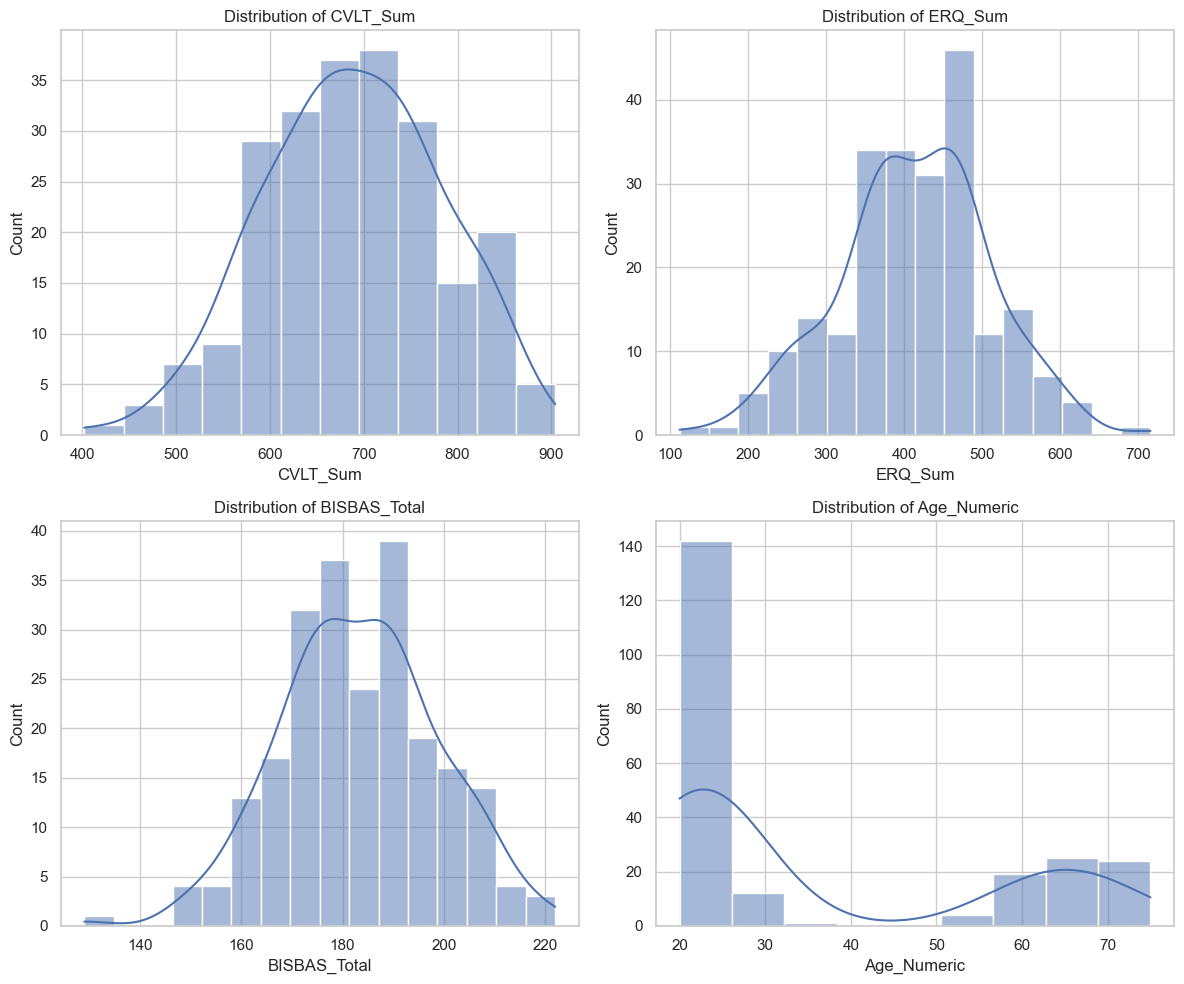

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn Style
sns.set(style="whitegrid")

# Plot Distributions of Key Features
key_features = {
    "CVLT_Sum": "CVLT (Verbal Learning)",
    "ERQ_Sum": "ERQ (Emotional Regulation)",
    "BISBAS_Total": "BISBAS (Behavioral Activation/Inhibition)",
    "Age_Numeric": "Age (Numeric)"
}
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, feature in zip(axes.flatten(), key_features):
    if feature in merged_data_clean.columns:
        sns.histplot(merged_data_clean[feature], kde=True, ax=ax)
        ax.set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()


### Distribution of Key Features

- **CVLT_Sum (California Verbal Learning Test):**  
  This test measures verbal learning and memory performance. A normal distribution is observed, with most scores clustering around 200–220. This suggests a typical cognitive performance in verbal learning across participants.

- **ERQ_Sum (Emotion Regulation Questionnaire):**  
  The ERQ assesses emotional regulation strategies, specifically *cognitive reappraisal* and *expressive suppression*. The distribution skews slightly right, with most scores between 50 and 70, indicating varying levels of emotional regulation among participants.

- **BISBAS_Total (Behavioral Inhibition and Activation System):**  
  The BIS/BAS scale measures motivational tendencies—BIS (inhibition for punishment) and BAS (activation for rewards). The distribution shows two peaks, suggesting the presence of distinct behavioral motivation patterns in the sample.

- **Age_Numeric:**  
  The age distribution is highly skewed, with most participants between 20–30 years old, and a smaller group in the 60–70 age range. This uneven age distribution will likely influence the `Relationship_Status`.

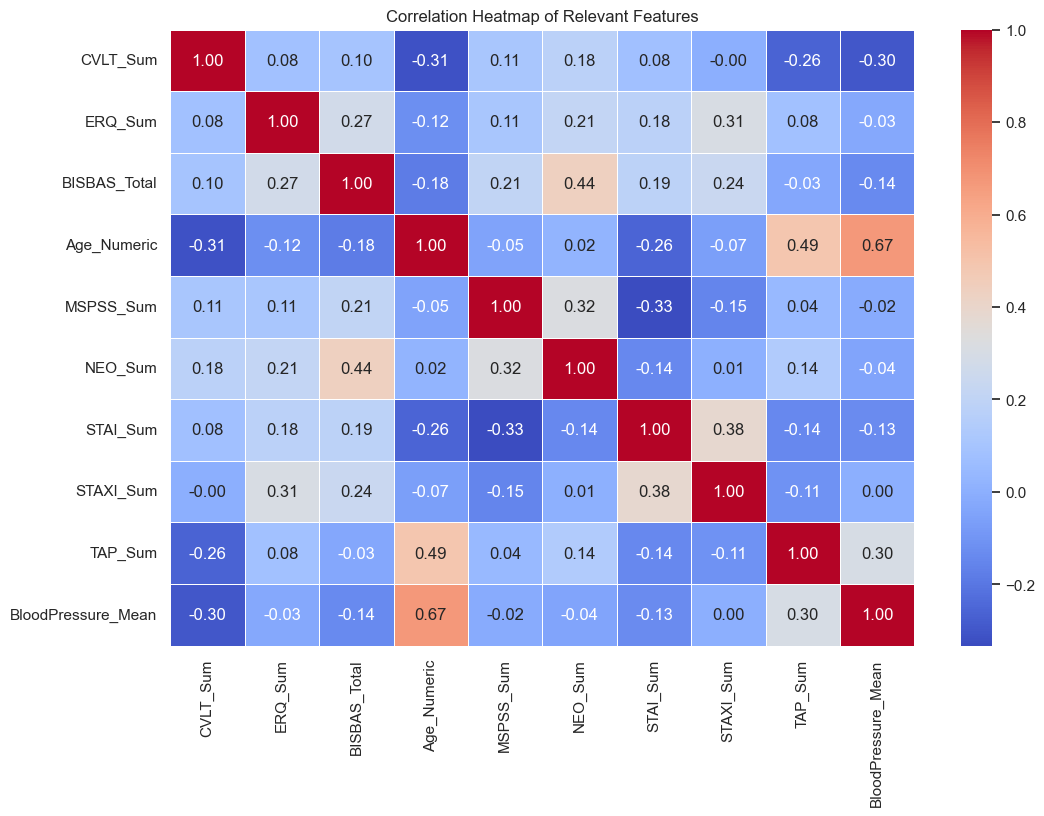

In [106]:
# Relevant Features for Correlation
relevant_features = [
    "CVLT_Sum", "ERQ_Sum", "BISBAS_Total", "Age_Numeric", 
    "MSPSS_Sum", "NEO_Sum", "STAI_Sum", "STAXI_Sum", "TAP_Sum", 
    "Anthropometry_Sum", "BloodPressure_Mean", "BloodSample_Sum"
]

# Filter Existing Features
existing_features = [feat for feat in relevant_features if feat in merged_data_clean.columns]

# Plot Correlation Heatmap
correlation_matrix = merged_data_clean[existing_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Relevant Features")
plt.show()

### Correlation Heatmap of Relevant Features

- **Purpose of the Heatmap:**  
  This heatmap visualizes the pairwise correlations between key features, which include cognitive, emotional, behavioral, and medical data. These correlations help us understand how different variables interact and which features might be most relevant in predicting the likelihood of being in a relationship.

- **Key Observations:**
  1. **`Age_Numeric` and `BloodPressure_Mean` (0.67):**  
     - Older participants tend to have higher blood pressure, a well-documented physiological trend. This strong correlation highlights the role of age in understanding participants' overall health and life stage, both of which may indirectly influence relationship status.

  2. **`Age_Numeric` and `TAP_Sum` (0.49):**  
     - Older participants tend to score higher on attentional performance (TAP). This might reflect better cognitive focus or experience in completing tasks, which could relate to maturity and readiness for long-term relationships.

  3. **`NEO_Sum` and `BISBAS_Total` (0.44):**  
     - Personality traits such as extraversion, openness, and conscientiousness (NEO) are moderately correlated with behavioral tendencies like reward sensitivity (BIS/BAS). This connection could suggest that individuals with specific personality traits may also exhibit behaviors that influence their likelihood of forming relationships.

  4. **`STAI_Sum` and `MSPSS_Sum` (-0.33):**  
     - Anxiety (STAI) negatively correlates with perceived social support (MSPSS). This indicates that participants with high levels of anxiety may perceive or experience less social support, potentially affecting their ability to form or maintain relationships.

  5. **`CVLT_Sum` and `STAI_Sum` (-0.26):**  
     - Verbal learning and memory (CVLT) scores negatively correlate with anxiety. Participants with higher anxiety might struggle with memory recall, which could indirectly influence their social interactions or emotional expression in relationships.

- **Interpretation of Test Scores:**
  - **`CVLT_Sum (California Verbal Learning Task):`**  
    Measures memory recall and learning. High scores indicate strong verbal memory, which might aid in effective communication—a key element in relationships.
  - **`ERQ_Sum (Emotion Regulation Questionnaire):`**  
    Assesses emotional regulation strategies. Participants with higher scores in reappraisal (positive regulation) may navigate emotional challenges in relationships more effectively.
  - **`BISBAS_Total (Behavioral Inhibition and Activation Scales):`**  
    Reflects reward-seeking and punishment-avoidance tendencies. Individuals with high BAS scores might actively pursue social or romantic opportunities.
  - **`MSPSS_Sum (Multidimensional Scale of Perceived Social Support):`**  
    Gauges perceived social support, which can enhance emotional well-being and relationship satisfaction. High scores are indicative of robust support networks.
  - **`NEO_Sum (NEO Five-Factor Inventory):`**  
    Captures personality traits like extraversion and agreeableness, which often correlate with relationship stability and success.
  - **`STAI_Sum (State-Trait Anxiety Inventory):`**  
    Indicates anxiety levels. High anxiety can hinder relationship formation due to emotional instability or social avoidance.
  - **`STAXI_Sum (State-Trait Anger Expression Inventory):`**  
    Measures anger regulation. Poor anger management might negatively affect interpersonal relationships.
  - **`TAP_Sum (Test of Attentional Performance):`**  
    Evaluates sustained attention and working memory. High scores suggest better cognitive control, potentially supporting conflict resolution in relationships.
  - **Medical Features:**  
    - **`BloodPressure_Mean:`** May indicate overall health, which can affect confidence, energy, and engagement in relationships.
    - **`Anthropometry_Sum:`** Represents physical attributes (height, weight, etc.). Physical health could influence self-esteem or perceived attractiveness.
    - **`BloodSample_Sum:`** Reflects health biomarkers. Abnormal readings might correlate with stress levels or energy, indirectly affecting relationship dynamics.

- **What This Means for Relationship Prediction:**  
  - The heatmap shows that some features, such as `Age_Numeric`, `BISBAS_Total`, `MSPSS_Sum`, and `NEO_Sum`, have moderate correlations with each other or medical features, suggesting they could play an indirect or combined role in predicting relationship status.
  - Features like anxiety (`STAI_Sum`) and social support (`MSPSS_Sum`) seem inversely related, indicating potential emotional barriers or facilitators to relationships.
  - Medical features like `BloodPressure_Mean` are strongly tied to age and may serve as proxies for life stage rather than direct predictors of relationship status.



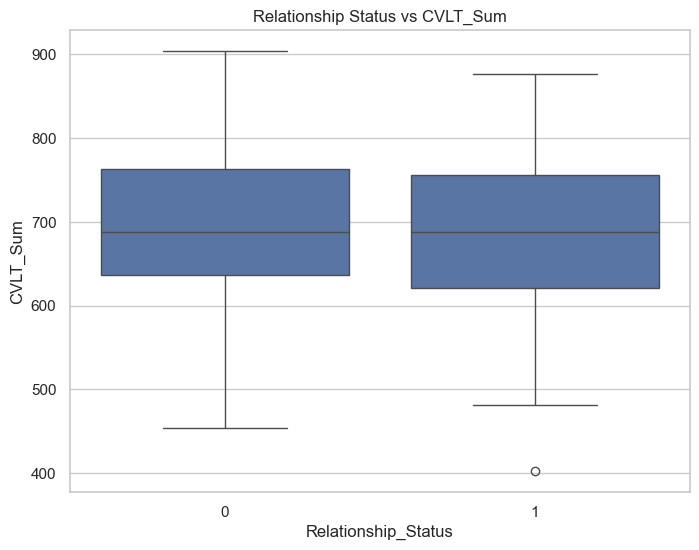

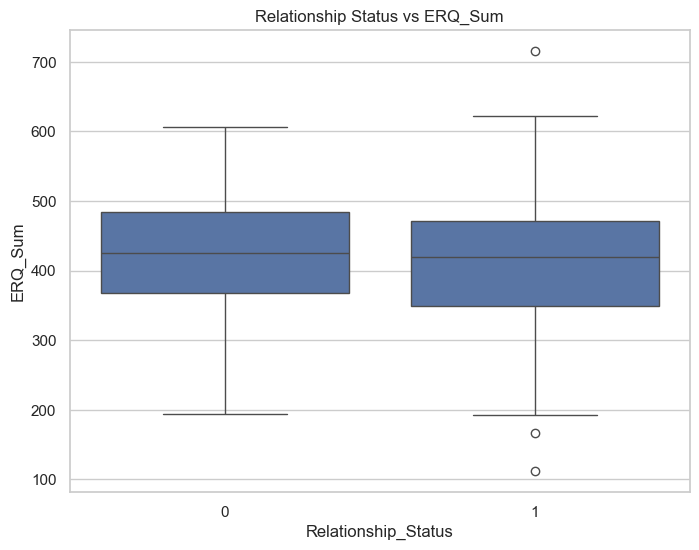

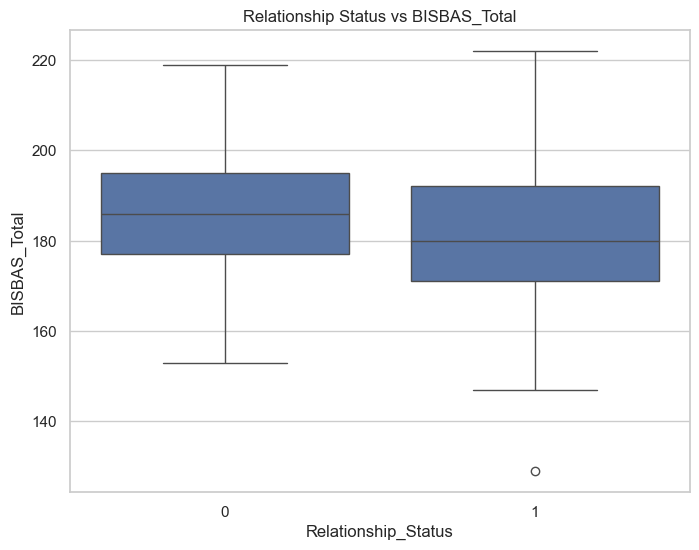

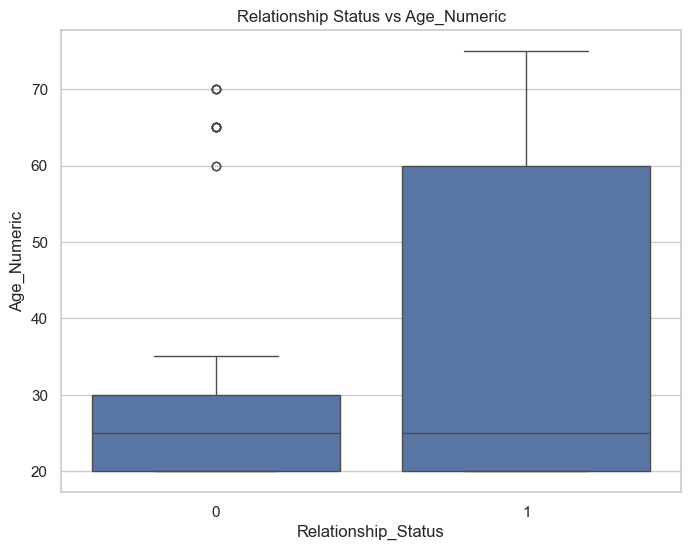

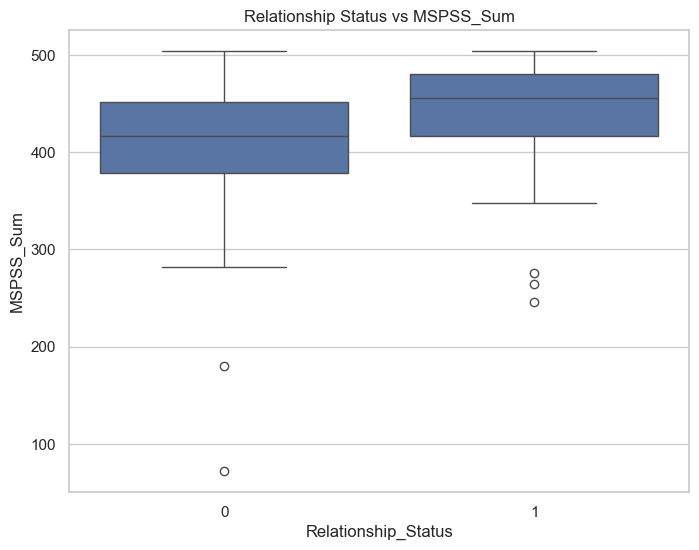

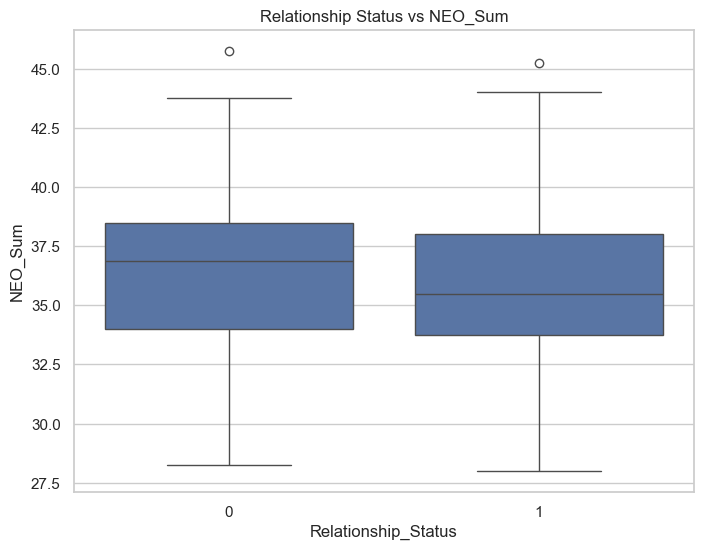

In [107]:
# Boxplots for Key Features by Relationship Status
boxplot_features = ["CVLT_Sum", "ERQ_Sum", "BISBAS_Total", "Age_Numeric", "MSPSS_Sum", "NEO_Sum"]

for feature in boxplot_features:
    if feature in merged_data_clean.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=merged_data_clean, x="Relationship_Status", y=feature)
        plt.title(f"Relationship Status vs {feature}")
        plt.show()

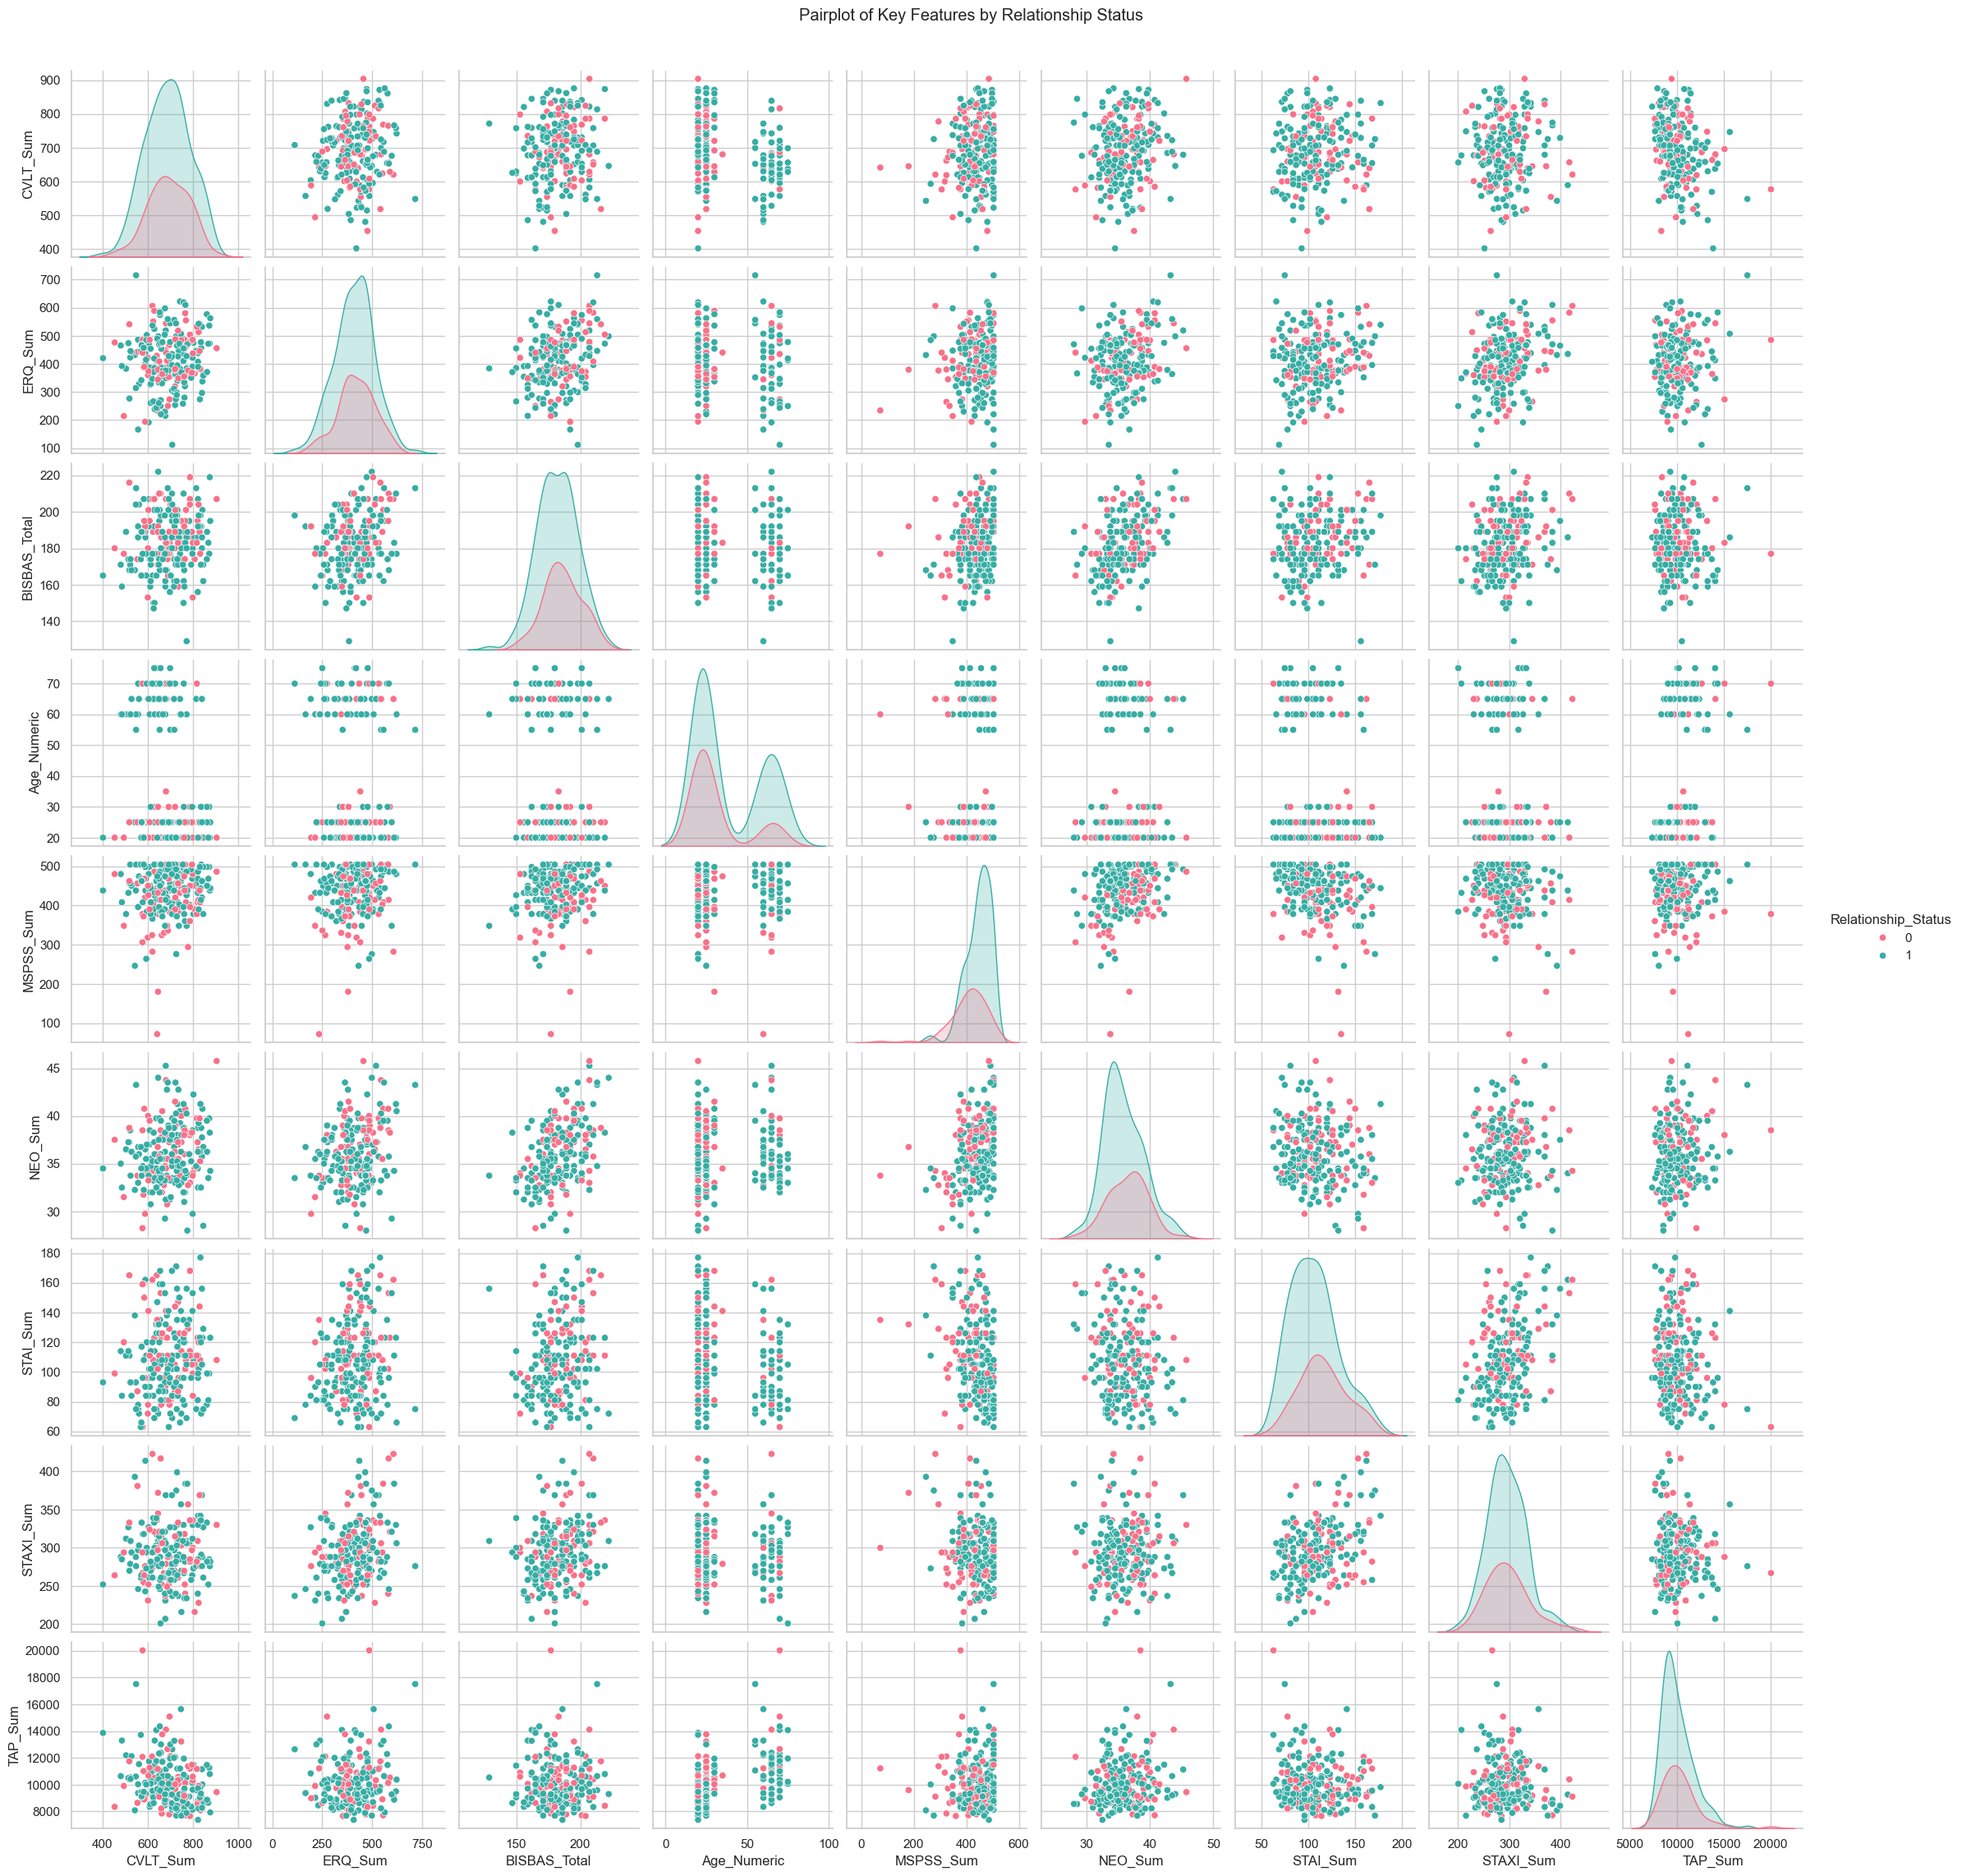

In [108]:
# Pairplot for Key Features by Relationship Status
pairplot_features = [
    "CVLT_Sum", "ERQ_Sum", "BISBAS_Total", "Age_Numeric", 
    "MSPSS_Sum", "NEO_Sum", "STAI_Sum", "STAXI_Sum", "TAP_Sum", 
    "Relationship_Status"
]

sns.pairplot(
    merged_data_clean[pairplot_features], 
    hue="Relationship_Status", 
    palette="husl"
)
plt.suptitle("Pairplot of Key Features by Relationship Status", y=1.02)
plt.show()

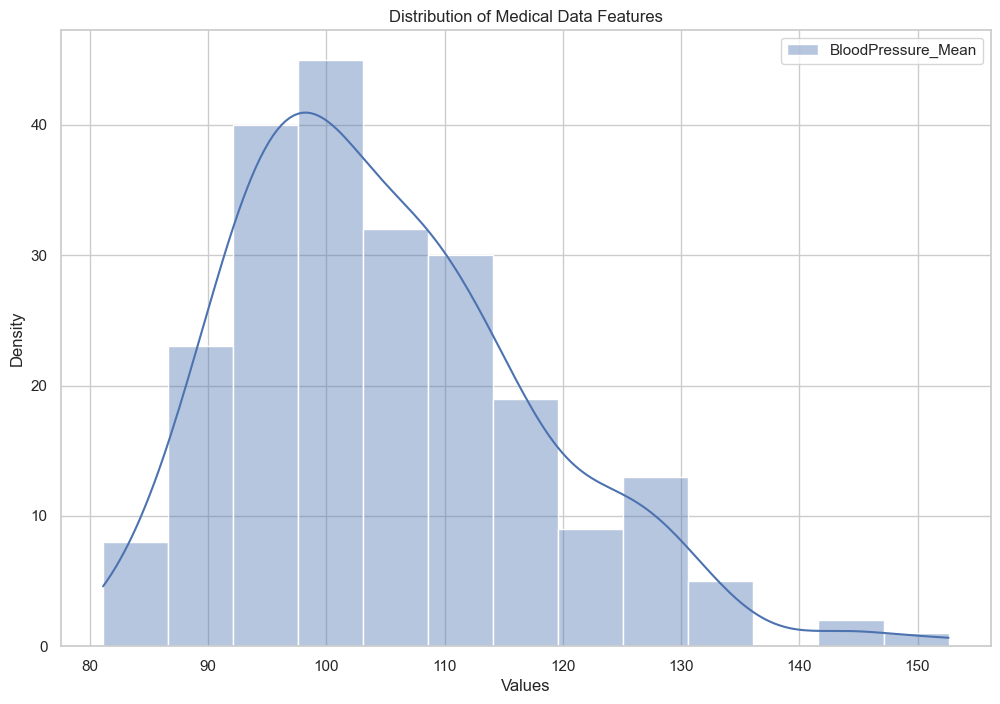

In [109]:
# Medical Data Visualization
medical_features = ["BloodPressure_Mean", "BloodSample_Sum", "Anthropometry_Sum"]
plt.figure(figsize=(12, 8))
for feature in medical_features:
    if feature in merged_data_clean.columns:
        sns.histplot(merged_data_clean[feature], kde=True, label=feature, fill=True, alpha=0.4)

plt.title("Distribution of Medical Data Features")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()
plt.show()

## What we now want to do

  - Focus on exploring multivariate relationships between emotional regulation (`ERQ_Sum`), personality traits (`NEO_Sum`), and behavioral tendencies (`BISBAS_Total`) to understand how they jointly influence relationship likelihood.
  - Evaluate whether medical and cognitive features like `BloodPressure_Mean` and `TAP_Sum` act as indirect predictors by correlating them with emotional or behavioral variables.
  - Test the predictive power of these features in a classification model to assess their combined utility for predicting relationship status.